In [1]:
### Piezometer installed in the ditch ###
# monitor the ditch water level
# piezometer installed before the second weir
# AP689

In [24]:
import pandas as pd
import xlrd
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
#from pandasql import sqldf
import datetime
import csv
import pdb
from tqdm.notebook import tqdm
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
def minor_formatter(x, ind):
    # only format if we don't overlap with a major tick
    if np.mod(x, 1) < .1:
        return ''
    return '{:.1f}'.format(np.mod(x, 1))
def alternate_formatter(x, ind):
    rm = np.mod(x, 1)
    if np.abs(rm) < .1:
        return '{:d}'.format(int(x))
    return '{:.1f}'.format(rm)
%matplotlib ipympl

In [25]:
%matplotlib ipympl
path1 = os.getcwd()
path = os.path.join(path1, 'data', 'raw_data')
#climate data from  www.dacom.nl
file = os.path.join(path, 'dacom_weather_data.csv')
clim=pd.read_csv(file,sep=';')
clim['date'] = pd.to_datetime(clim['date'], format = '%m/%d/%Y')
print(clim)
climday = clim.groupby(clim.date.dt.floor('d')).agg({'precipitation': ['sum']})
climday.columns  = ['_'.join(col) for col in climday.columns.values]
climday.reset_index(inplace=True)
print(climday)

           date      time  air_temperature  rel_humidity  precipitation  \
0    2022-05-17  12:00 AM            15.57         90.16            0.0   
1    2022-05-17   1:00 AM            15.20         95.71            0.0   
2    2022-05-17   2:00 AM            15.11         97.59            0.0   
3    2022-05-17   3:00 AM            14.91         92.53            0.0   
4    2022-05-17   4:00 AM            14.72        100.00            0.0   
...         ...       ...              ...           ...            ...   
4547 2022-11-22  10:00 AM             6.02        100.00            0.0   
4548 2022-11-22  11:00 AM             6.46        100.00            0.0   
4549 2022-11-22  12:00 PM             7.03        100.00            0.0   
4550 2022-11-22   1:00 PM             7.73        100.00            0.0   
4551 2022-11-22   2:00 PM             8.30        100.00            0.0   

      wind_speed  wind_direction  radiation  radiation_short  
0           0.54          164.34    

In [26]:
path1 = os.getcwd()
datapath =  os.path.join(path1, 'Data_Ditch')
xls_files = glob.glob(datapath + "\*.xlsx") # change to csv 

baro_ind='AP825'
ind = 0
diver_names={}
alldf={}
for i,f in tqdm(enumerate(xls_files),total=len(xls_files)):
    # read the csv file
    df = pd.read_excel(f)
    #print(df)
    # remove double copied parts of the logged data from the raw data files
    df=df.drop_duplicates()  
    df=df.assign(Date=df.TimeStamp.dt.round('H'))
    
    df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
    df=df.loc[(df['TimeStamp'] > '2022-10-18 14:27:20')]
    dfdaily=df.resample('D', on = 'Date').mean()
    
    if baro_ind in f:
        baro_data=df
        baro_data=baro_data.loc[(baro_data['TimeStamp'] > '2022-08-02 12:00:00')]
        #baro_data=baro_data.append.df# this tests for substrings
    if ind == 0:
        #First data frame loaded
        GWdata = df
        GWdata_daily = dfdaily

print(GWdata)
print(baro_data)


     MonitoringPoint SerialNumber           TimeStamp     Pressure  \
1               ILVO        AP689 2022-10-18 14:57:20  1046.708333   
2               ILVO        AP689 2022-10-18 15:27:20  1067.333333   
3               ILVO        AP689 2022-10-18 15:57:20  1067.150000   
4               ILVO        AP689 2022-10-18 16:27:20  1067.241667   
5               ILVO        AP689 2022-10-18 16:57:20  1066.966667   
...              ...          ...                 ...          ...   
1629            ILVO        AP689 2022-11-21 12:57:20  1038.000000   
1630            ILVO        AP689 2022-11-21 13:27:20  1036.991667   
1631            ILVO        AP689 2022-11-21 13:57:20  1036.166667   
1632            ILVO        AP689 2022-11-21 14:27:20  1035.158333   
1633            ILVO        AP689 2022-11-21 14:57:20  1033.875000   

      Temperature  Conductivity  WaterLevel  WaterLevelReference  \
1       25.663333           NaN         NaN                  NaN   
2       14.226667     

In [27]:
#Soil elevation: 19.21 mTAW
#Well height above the ground: 230cm
#Rope length: 251cm

      index MonitoringPoint SerialNumber           TimeStamp     Pressure  \
0         1            ILVO        AP689 2022-10-18 14:57:20  1046.708333   
1         2            ILVO        AP689 2022-10-18 15:27:20  1067.333333   
2         3            ILVO        AP689 2022-10-18 15:57:20  1067.150000   
3         4            ILVO        AP689 2022-10-18 16:27:20  1067.241667   
4         5            ILVO        AP689 2022-10-18 16:57:20  1066.966667   
...     ...             ...          ...                 ...          ...   
1628   1629            ILVO        AP689 2022-11-21 12:57:20  1038.000000   
1629   1630            ILVO        AP689 2022-11-21 13:27:20  1036.991667   
1630   1631            ILVO        AP689 2022-11-21 13:57:20  1036.166667   
1631   1632            ILVO        AP689 2022-11-21 14:27:20  1035.158333   
1632   1633            ILVO        AP689 2022-11-21 14:57:20  1033.875000   

      Temperature  Conductivity  WaterLevel  WaterLevelReference  \
0      

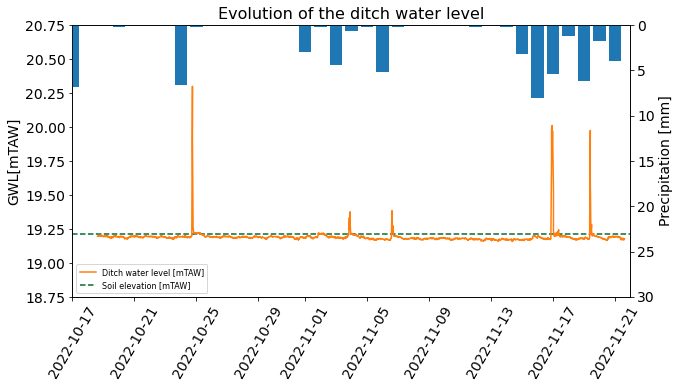

In [44]:
wellinfo = { 'SerialNumber' : ['AP689'],
            'soil_mTAW' : [19.21],
            'well_height' : [2.30],
            'top_well_cm' :[2151],
            'RL' : [251],}

alldata={}
date1=datetime.date(2022,10,17)
date2=datetime.date(2022,11,22)
ftsz=16
fig, ax= plt.subplots(figsize=(10,5))
axb=ax.twinx()


ddd=GWdata.reset_index()
print(ddd)
dataall=baro_data.merge(ddd[['Date','Pressure']], left_on = 'TimeStamp', right_on='Date')
dataall[dataall['Pressure_y'].notna()]
dataall = dataall[dataall['Pressure_x']<dataall['Pressure_y']]
dataall["WL"]=(dataall['Pressure_y']-dataall['Pressure_x'])
dataall=dataall.reset_index()
dataall["RL"]=251
dataall["top_well_cm"]=2151
dataall["GWL"]=-dataall['RL']+dataall['top_well_cm']+dataall["WL"]    
ax.plot(dataall.Date_x,(dataall["GWL"]/100), color='#ff7f0e', label="Ditch water level [mTAW]")
ax.set_ylim([18.75,20.75])
ax.set_ylabel('GWL[mTAW]', fontsize= ftsz-2)
ax.hlines(y=19.21, xmin = date1, xmax = date2, color='#026b2e', linestyle = '--', label="Soil elevation [mTAW]")
ax.set_title('Evolution of the ditch water level', fontsize=ftsz)
ax.tick_params(axis='x', which='both', labelsize=ftsz-2,rotation=60)
ax.tick_params(axis='y', which='both', labelsize=ftsz-2)
ax.legend(loc='lower left', fontsize=8)
alldata=dataall

axb.bar(climday['date'],climday.precipitation_sum)
axb.set_ylim([0, 30])
axb.invert_yaxis()
axb.set_ylabel('Precipitation [mm]', fontsize= ftsz-2)
axb.tick_params(axis='x', which='both', labelsize=ftsz-2)
axb.tick_params(axis='y', which='both', labelsize=ftsz-2)

axb.set_xlim([date1,date2])

print(dataall)

fig.savefig('DitchWaterLevel.png')   # save the figure to file
